# Second Assignment

The goal of this assignment is to use the iris dataset to train a classifier in asupervised fashion and a clusterer in unsupervised fashion.

**Deadline: To Be Confirmed by the Tutor**. 

**Submission:** Please email your solutions and your completed Declaration of Authorship (DoA) form to weeklyclasses@conted.ox.ac.uk 

## Setup

In [1]:
# Python ≥3.8 is required
import sys
assert sys.version_info >= (3, 8)

# Scikit-Learn ≥ 1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

### Import data and training test split

Let's import the iris dataset first.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Train-test splitting (3 points)

As a first step let's split the dataset into training (2/3 of the data) and test set (1/3 of the data)

In [3]:
# Write your solution here
from sklearn.model_selection import train_test_split

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, random_state=77)

### Feature scaling (4 points)

Then let's perform feature scaling (up to you whether you want to use standardisation or normalisation)

In [4]:
# Write your solution here: Normalisation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Part 1: Supervised training using K-Nearest Neighbourse


### Model creation (6 points) and training (2 points)

Now, evaluate the performance of your classifier using the confusion matrix. Compute and visualize the confusion matrix for our three classes

Now, let's create and train a `KNeighborsClassifier`.

We want the following properties for our classifier:
* check 7 neighbours by default for the `kneighbors` queries.
* use the Manhattan distance metric to identify neighbours
* use the Ball Tree algortihm to compute the nearest neighbours, with a `leaf_size` of 3. Check the Ball Tree algorithm documentation on scikit-learn for more details.

Check the `KNeighborsClassifier` documentation to identify the arguments to pass to the `KNeighborsClassifier` constructor.

In [5]:
# Write your code here
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

kn_cl = KNeighborsClassifier(n_neighbors=7, algorithm= 'ball_tree', leaf_size= 3, metric='manhattan')
kn_cl.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=3, metric='manhattan',
                     n_neighbors=7)

### Evaluation on the training set (5 points)

Now, evaluate the performance of your classifier using the confusion matrix. Compute and visualize the confusion matrix for our three classes

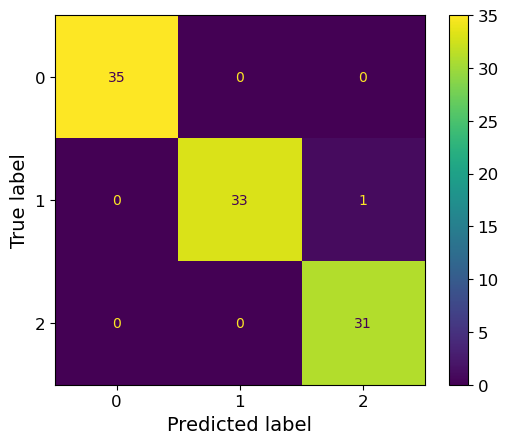

In [6]:
# Write your code here
y_train_pred = kn_cl.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = kn_cl.classes_)
cm_display.plot()
plt.show()

Compute precision, recall, and F1 score for each class prediction on the training set and print out a report.

In [7]:
# Write your code here
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

ps = precision_score(y_true=y_train, y_pred=y_train_pred, average=None)
rs = recall_score(y_true=y_train, y_pred=y_train_pred, average=None)
f1s = f1_score(y_true=y_train, y_pred=y_train_pred, average=None)

print("Precision:", ps)
print("Recall:", rs)
print("F1:", f1s)

score_report  = classification_report(y_train, y_train_pred, target_names= iris.target_names)
print(score_report)

Precision: [1.   1.   0.97]
Recall: [1.   0.97 1.  ]
F1: [1.   0.99 0.98]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       1.00      0.97      0.99        34
   virginica       0.97      1.00      0.98        31

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



How does the result look like? Has anything been misclassified?

Class 0 was classified with no errors, wheras class 2 got predicted as class 1 once. Other than that there were no errors

### Evaluation on the test set (5 points)

Now make predictions on the test set, compute the confusion matrix for the test set. how does it compare to the one of the training set?

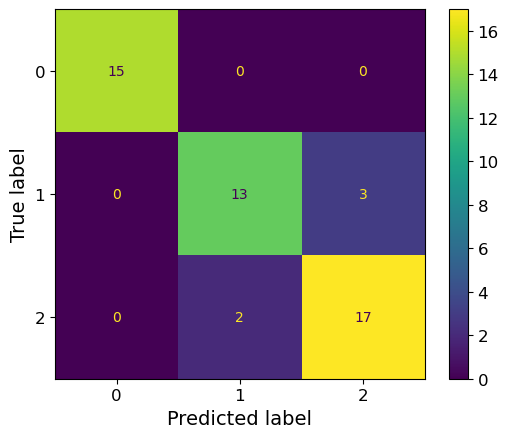

In [8]:
# Write your code here
y_test_pred = kn_cl.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = kn_cl.classes_)
cm_display.plot()
plt.show()


Class 0 was predicted perfectly, wheras class 2 was predicted as class 1 twice and class 1 was predicted as class 2 three times, suggesting maybe this data has some overlap wheras class 0 was distinct.

Compute precision, recall, and F1 score for each class prediction on the test set and print out a report.

In [9]:
# Write your code here
ps = precision_score(y_true=y_test, y_pred=y_test_pred, average=None)
rs = recall_score(y_true=y_test, y_pred=y_test_pred, average=None)
f1s = f1_score(y_true=y_test, y_pred=y_test_pred, average=None)

print("Precision:", ps)
print("Recall:", rs)
print("F1:", f1s)

score_report  = classification_report(y_test, y_test_pred, target_names= iris.target_names)
print(score_report)

Precision: [1.   0.87 0.85]
Recall: [1.   0.81 0.89]
F1: [1.   0.84 0.87]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.87      0.81      0.84        16
   virginica       0.85      0.89      0.87        19

    accuracy                           0.90        50
   macro avg       0.91      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



## Part 2: Unsupervised Learning using K-Means (10 points)

Train K-means clusterers on the entire iris dataset.

Train clusters with 2 to 6 clusters and use one of the metrics discussed in week 7 to show which is the optimal number of clusters

Elbow method

In [10]:
# Write your code here. Add as many cells as you need.
from sklearn.cluster import KMeans

kmeans_per_k = [
    KMeans(n_clusters=k, random_state=42).fit(X)
    for k in range(2, 7)
]
inertias = [model.inertia_ for model in kmeans_per_k]

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

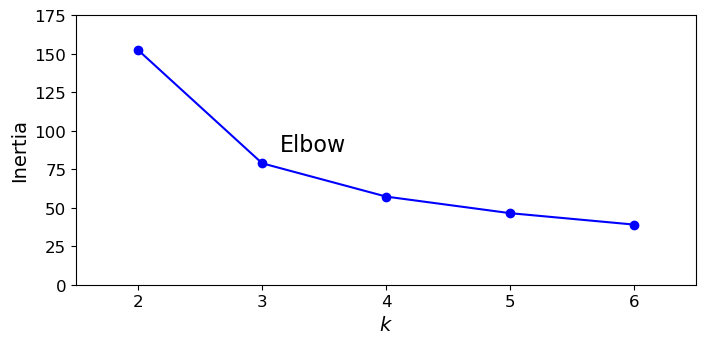

In [11]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 7), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# add an arrow pointing to the elbow
plt.axis([1.5, 6.5, 0, 175])
plt.annotate('Elbow',
             xy=(3, inertias[3]),
             xytext=(0.35, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             #arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

There is an elbow at $k=3$, as we can see a sharp decrease in inertia between $k=2$ and $k=3$ but then the decrease plateaus after $k=3$, so this seems like a sensible number of clusters (and from knowing iris has 3 categories this makes sense).